# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.7.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.7.1 on the current Colab Runtime...
2022-07-10 07:44:27 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.7/julia-1.7.1-linux-x86_64.tar.gz [123374573/123374573] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.7.1
Commit ac5cc99908 (2021-12-22 19:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: AMD EPYC 7B12
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, znver2)
Environment:
  JULIA_NUM_THREADS = 2


In [2]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  391.334 ms (2 allocations: 32.00 MiB)


In [3]:
if ENV["COLAB_GPU"] == "1"
    using CUDA

    run(`nvidia-smi`)

    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
else
    println("No GPU found.")
end

No GPU found.


In [5]:
import Pkg; Pkg.add("Bloqade")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Calculus ───────────────────────── v0.5.1
   Installed HypergeometricFunctions ────────── v0.3.10
   Installed TreeViews ──────────────────────── v0.3.0
   Installed LuxorGraphPlot ─────────────────── v0.1.6
   Installed SIMDDualNumbers ────────────────── v0.1.1
   Installed StatsFuns ──────────────────────── v1.0.1
   Installed OffsetArrays ───────────────────── v1.12.7
   Installed Rsvg ───────────────────────────── v1.0.0
   Installed Referenceables ─────────────────── v0.1.2
   Installed PDMats ─────────────────────────── v0.11.16
   Installed Unitful ────────────────────────── v1.11.0
   Installed NonlinearSolve ─────────────────── v0.3.21
   Installed BitBasis ───────────────────────── v0.8.1
   Installed Contour ────────────────────────── v0.5.7
   Installed Bloqade ────────────────────────── v0.1.9
   Installed MarchingCubes ──────────────────── v0.1.3
   Installed InlineSt

In [6]:
import Pkg; Pkg.add("PythonCall")

   Resolving package versions...
    Updating `~/.julia/environments/v1.7/Project.toml`
  [6099a3de] + PythonCall v0.9.3
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [7]:
import Pkg; Pkg.add("KrylovKit")

   Resolving package versions...
    Updating `~/.julia/environments/v1.7/Project.toml`
  [0b1a1467] + KrylovKit v0.5.4
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [8]:
import Pkg; Pkg.add("SparseArrays")

   Resolving package versions...
    Updating `~/.julia/environments/v1.7/Project.toml`
  [2f01184e] + SparseArrays
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [9]:
using Bloqade
using PythonCall
using KrylovKit
using SparseArrays

plt = pyimport("matplotlib.pyplot");

Task 1

Simulating the preparation of a quantum state in a 1D Rydberg atom array of 9 sites.

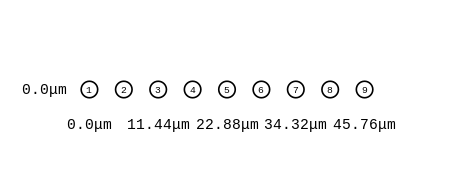

In [ ]:
nsites = 9
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [ ]:
Ω = 2π * 4
Δ_step = 30
Δ = LinRange(-2π * 10, 2π * 10, Δ_step);

In [ ]:
density_g = zeros(Δ_step, nsites)

for ii in 1:Δ_step
    h_ii = rydberg_h(atoms; Δ = Δ[ii], Ω) # create the Rydberg Hamiltonian
    h_m = mat(h_ii) # convert the Hamiltonian into a matrix
    vals, vecs, info = KrylovKit.eigsolve(h_m, 1, :SR) # find the ground state eigenvalue and eigenvector
    g_state = ArrayReg(vecs[1]) # creates the initial state with all atoms in ``| 0 \rangle`` state

    for jj in 1:nsites
        density_g[ii, jj] = rydberg_density(g_state, jj) # measure the density of Rydberg excitations on each site
    end
end

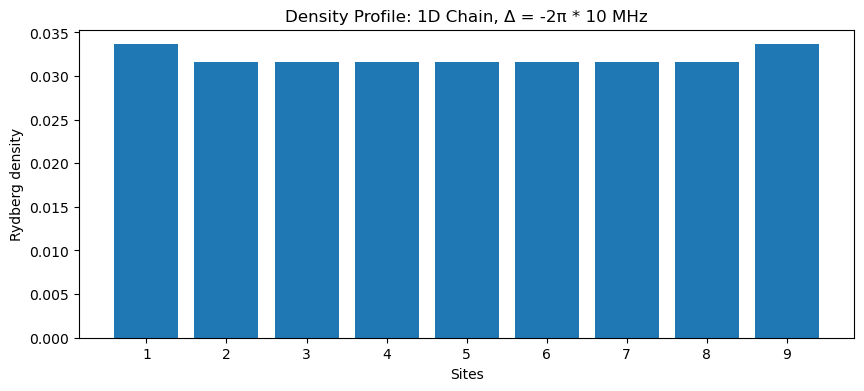

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[1, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = -2π * 10 MHz")
fig

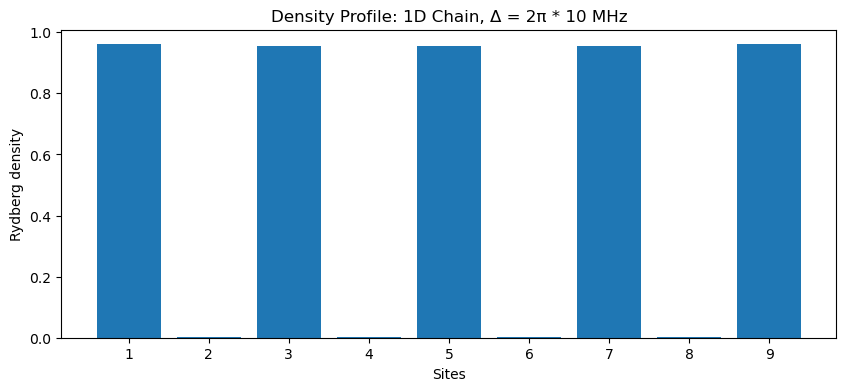

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[30, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = 2π * 10 MHz")
fig

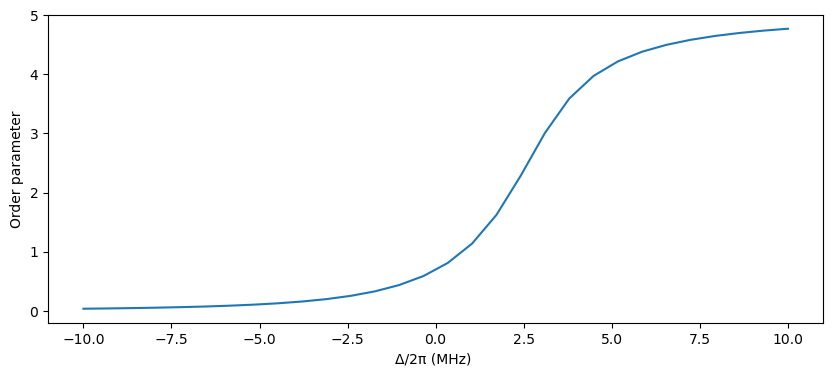

In [ ]:
order_para = map(1:Δ_step) do ii
    return sum(density_g[ii, 1:2:nsites]) - sum(density_g[ii, 2:2:nsites])
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(Δ / 2π, order_para)
ax.set_xlabel("Δ/2π (MHz) ")
ax.set_ylabel("Order parameter")
fig

In [ ]:
total_time = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

In [ ]:
U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, total_time], values = [U1, U1, U2, U2]);

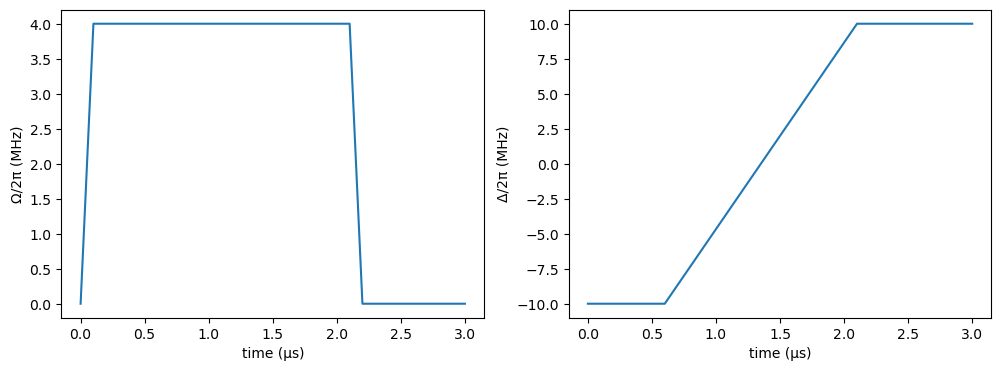

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

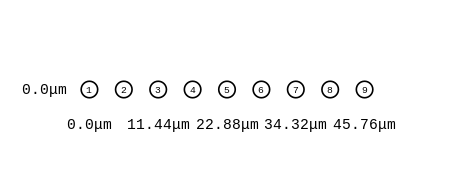

In [ ]:
nsites = 9
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [ ]:
h = rydberg_h(atoms; Δ, Ω)

nqubits: 9
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


In [ ]:
reg = zero_state(9);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

In [ ]:
densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

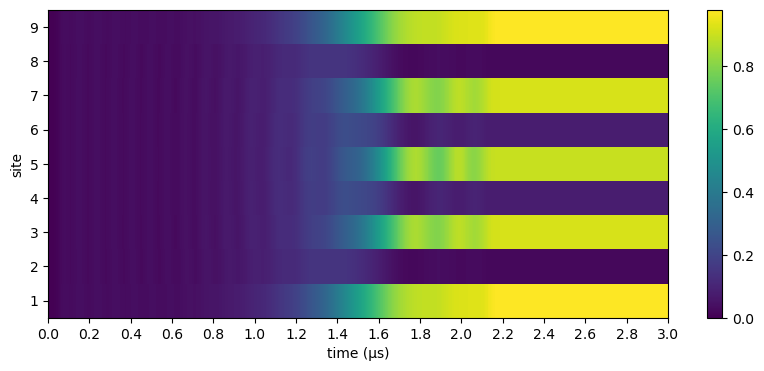

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

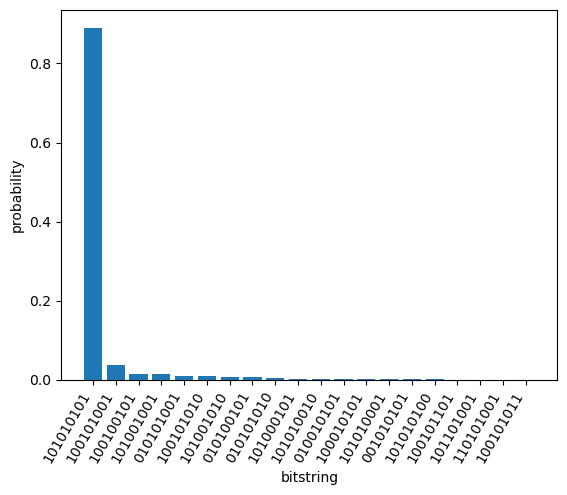

In [ ]:
bitstring_hist(reg; nlargest = 20)

Task 2 part a

17 atoms seems to be the maximum amout, when it goes to 19 atoms the bit strings all go to "ones".

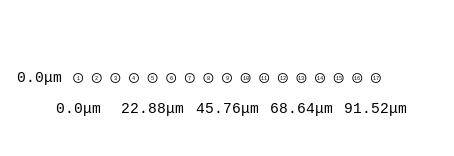

In [ ]:
nsites = 17
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [ ]:
Ω = 2π * 4
Δ_step = 30
Δ = LinRange(-2π * 10, 2π * 10, Δ_step);

In [ ]:
density_g = zeros(Δ_step, nsites)

for ii in 1:Δ_step
    h_ii = rydberg_h(atoms; Δ = Δ[ii], Ω) # create the Rydberg Hamiltonian
    h_m = mat(h_ii) # convert the Hamiltonian into a matrix
    vals, vecs, info = KrylovKit.eigsolve(h_m, 1, :SR) # find the ground state eigenvalue and eigenvector
    g_state = ArrayReg(vecs[1]) # creates the initial state with all atoms in ``| 0 \rangle`` state

    for jj in 1:nsites
        density_g[ii, jj] = rydberg_density(g_state, jj) # measure the density of Rydberg excitations on each site
    end
end

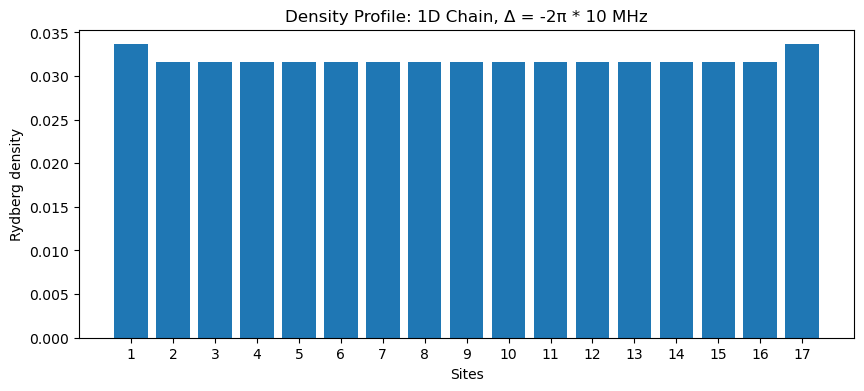

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[1, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = -2π * 10 MHz")
fig

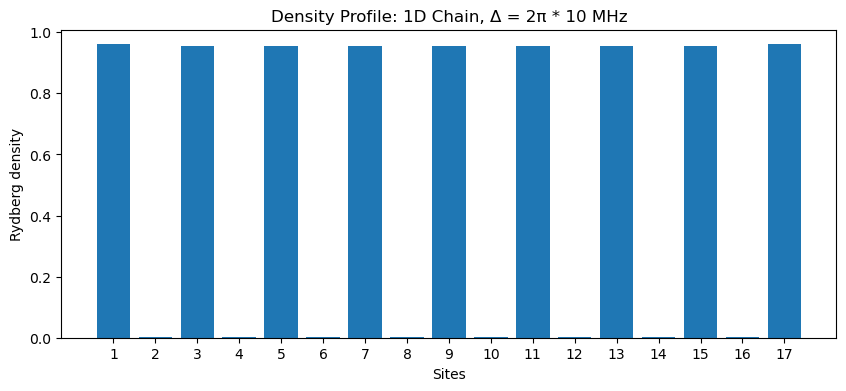

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[30, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = 2π * 10 MHz")
fig

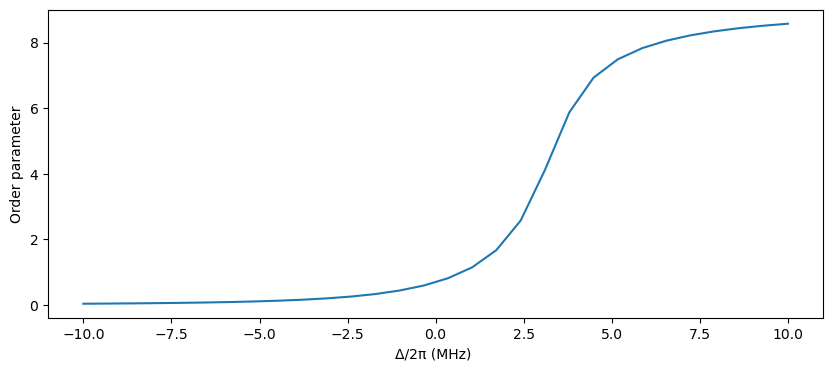

In [ ]:
order_para = map(1:Δ_step) do ii
    return sum(density_g[ii, 1:2:nsites]) - sum(density_g[ii, 2:2:nsites])
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(Δ / 2π, order_para)
ax.set_xlabel("Δ/2π (MHz) ")
ax.set_ylabel("Order parameter")
fig

In [ ]:
total_time = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

In [ ]:
U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, total_time], values = [U1, U1, U2, U2]);

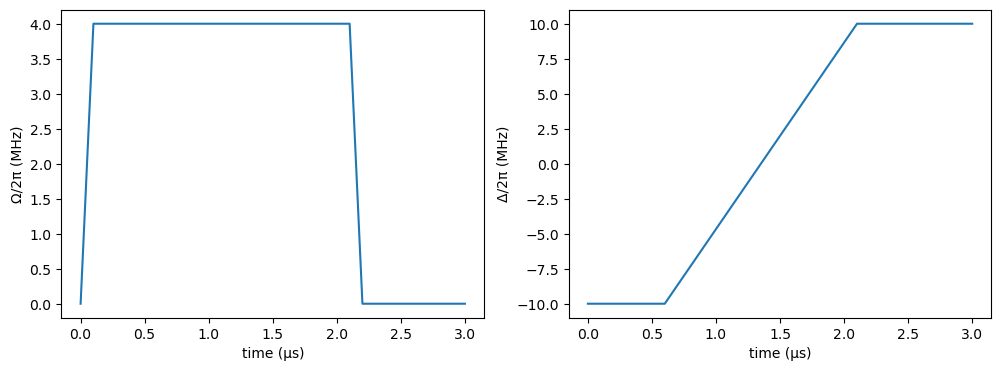

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

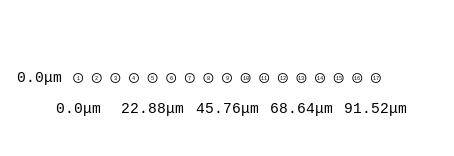

In [ ]:
nsites = 17
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [ ]:
h = rydberg_h(atoms; Δ, Ω)

nqubits: 17
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


In [ ]:
reg = zero_state(17);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

In [ ]:
densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

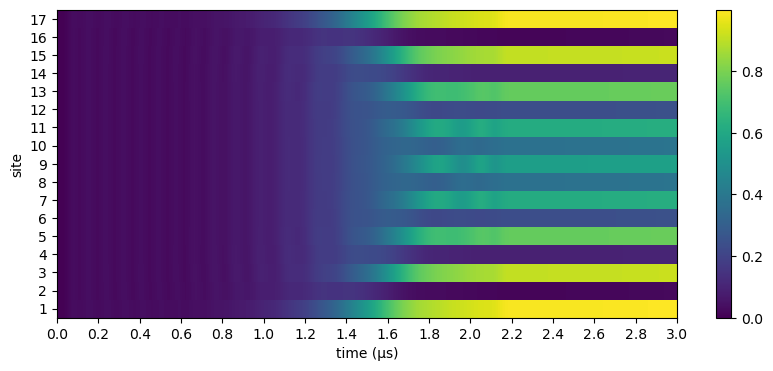

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

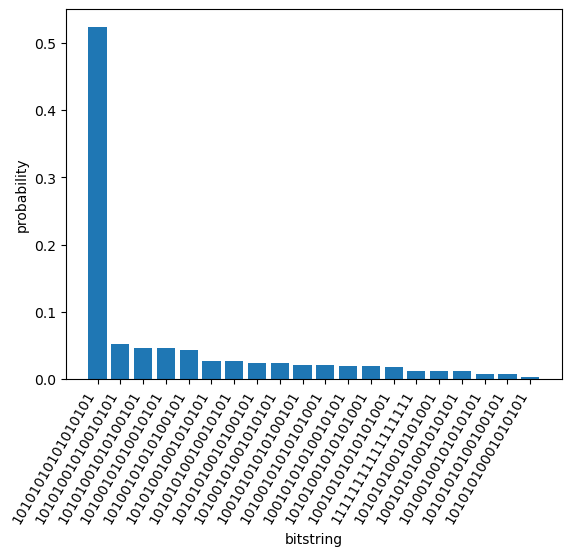

In [ ]:
bitstring_hist(reg; nlargest = 20)

Task 2 part b

Comparing the blockade approximation of 17 atoms relative to initial amount of 9 atoms

In [ ]:
space = blockade_subspace(atoms, 5.73);

In [ ]:
reg = zero_state(space)

SubspaceArrayReg{2, ComplexF64, Vector{ComplexF64}, Subspace{Vector{Int64}}}(17, ComplexF64[1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], Subspace{Vector{Int64}}(17, Dict(65808 => 2648, 42005 => 2364, 81928 => 3577, 66578 => 2739, 16464 => 1017, 17554 => 1176, 1090 => 168, 70805 => 3152, 32928 => 1645, 16980 => 1109…), [0, 1, 2, 4, 5, 8, 9, 10, 16, 17  …  87364, 87365, 87368, 87369, 87370, 87376, 87377, 87378, 87380, 87381]))

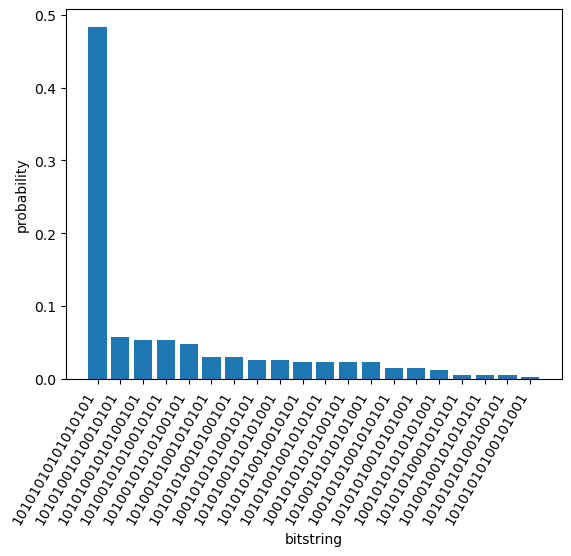

In [ ]:
prob = SchrodingerProblem(reg, total_time, h)
emulate!(prob)
bitstring_hist(prob.reg; nlargest = 20)

Task 3

Loading appropriate packages.

In [3]:
import Pkg; Pkg.add("Graphs")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [4]:
import Pkg; Pkg.add("Random")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [5]:
import Pkg; Pkg.add("GenericTensorNetworks")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [6]:
import Pkg; Pkg.add("Optim")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [7]:
import Pkg; Pkg.add("Bloqade")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [8]:
import Pkg; Pkg.add("PythonCall")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [9]:
using Graphs
using Bloqade
using Random
using GenericTensorNetworks
using Optim
using PythonCall
plt = pyimport("matplotlib.pyplot");

Finding the solution for a Maximum Independent Set (MIS) problem using the adiabatic approach.

In this initial 4x4 DUGG setup the MIS size is 4, and the number of maximum independent sets is 26.

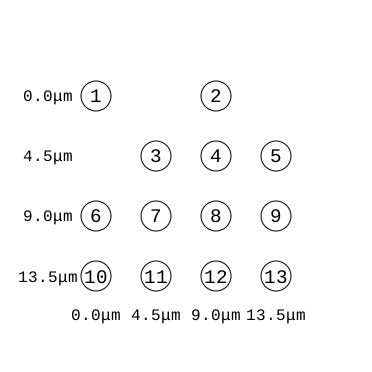

In [38]:
Random.seed!(2)
atoms = generate_sites(SquareLattice(), 4, 4; scale = 4.5) |> random_dropout(0.2)

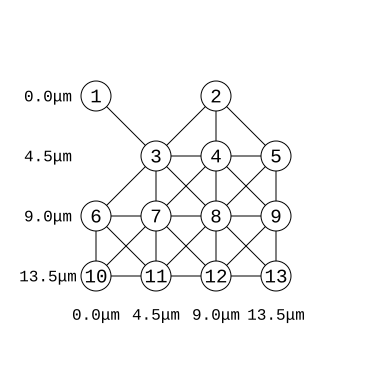

In [39]:
Bloqade.plot(atoms, blockade_radius = 7.5)

In [40]:
graph = BloqadeMIS.unit_disk_graph(atoms, 7.5)
mis_size_and_counting = GenericTensorNetworks.solve(IndependentSet(graph), CountingMax())[]

(4.0, 26.0)ₜ

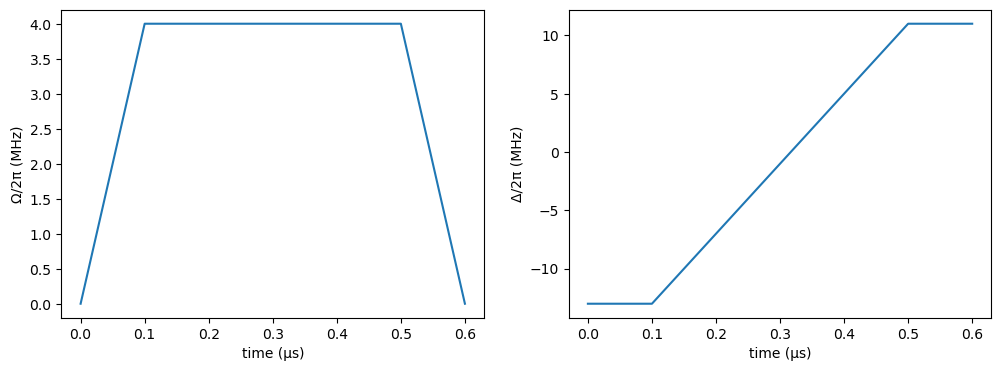

In [41]:
T_max = 0.6
Ω_max = 2π * 4
Ω = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [0.0, Ω_max, Ω_max, 0])
Δ_start = -2π * 13
Δ_end = 2π * 11
Δ = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [Δ_start, Δ_start, Δ_end, Δ_end])

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

In [42]:
hamiltonian = rydberg_h(atoms; Ω = Ω, Δ = Δ)
prob = SchrodingerProblem(zero_state(nqubits(hamiltonian)), T_max, hamiltonian)
emulate!(prob)

SchrodingerProblem:
  register info:
    type: ArrayReg{2, ComplexF64, Matrix{ComplexF64}}
    storage size: 8 bytes

  time span (μs): (0.0, 0.6)

  equation: 
    storage size: 1.688 MiB
    expression:
nqubits: 13
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


  options:
    save_everystep: false
    save_start: false
    save_on: false
    dense: false


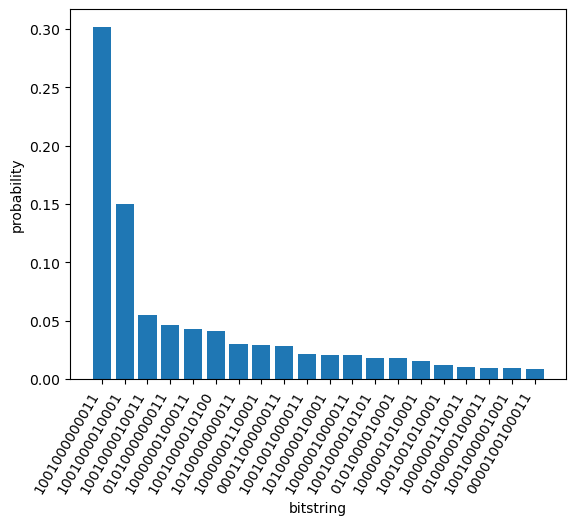

In [43]:
bitstring_hist(prob.reg; nlargest = 20)

In [44]:
best_bit_strings = most_probable(prob.reg, 2)
all_optimal_configs = GenericTensorNetworks.solve(IndependentSet(graph), ConfigsMax())[]
@assert all(bs -> GenericTensorNetworks.StaticBitVector([bs...]) ∈ all_optimal_configs.c, best_bit_strings)

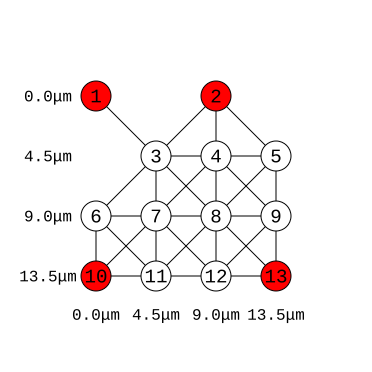

In [45]:
Bloqade.plot(atoms, blockade_radius = 7.5; colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[1]])

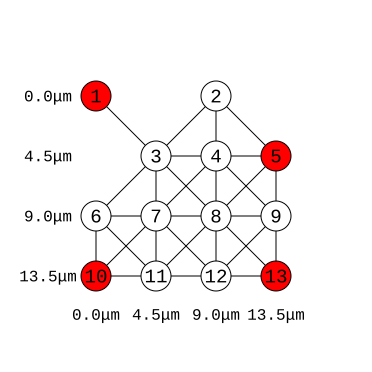

In [46]:
Bloqade.plot(atoms, blockade_radius = 7.5; colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[2]])

In [47]:
best5_bit_strings = most_probable(prob.reg, 3)
BloqadeMIS.is_independent_set.(best5_bit_strings, Ref(graph))

3-element BitVector:
 1
 1
 0

In [48]:
fixed = mis_postprocessing(best5_bit_strings[3], graph)
BloqadeMIS.is_independent_set(fixed, graph)

true

Task 3 part b

In this scaled up 26 x 26, DUGG setup the MIS size is 162, and the number of maximum independent sets is 6.2626787235072e14 !!!!.

Attemps to create DUGGS, greater than 26 X 26 take an extremely long time to calculate not sure if this is the max but this is the largest that was acheived without waiting for some extended period time without any ouput from the cell.

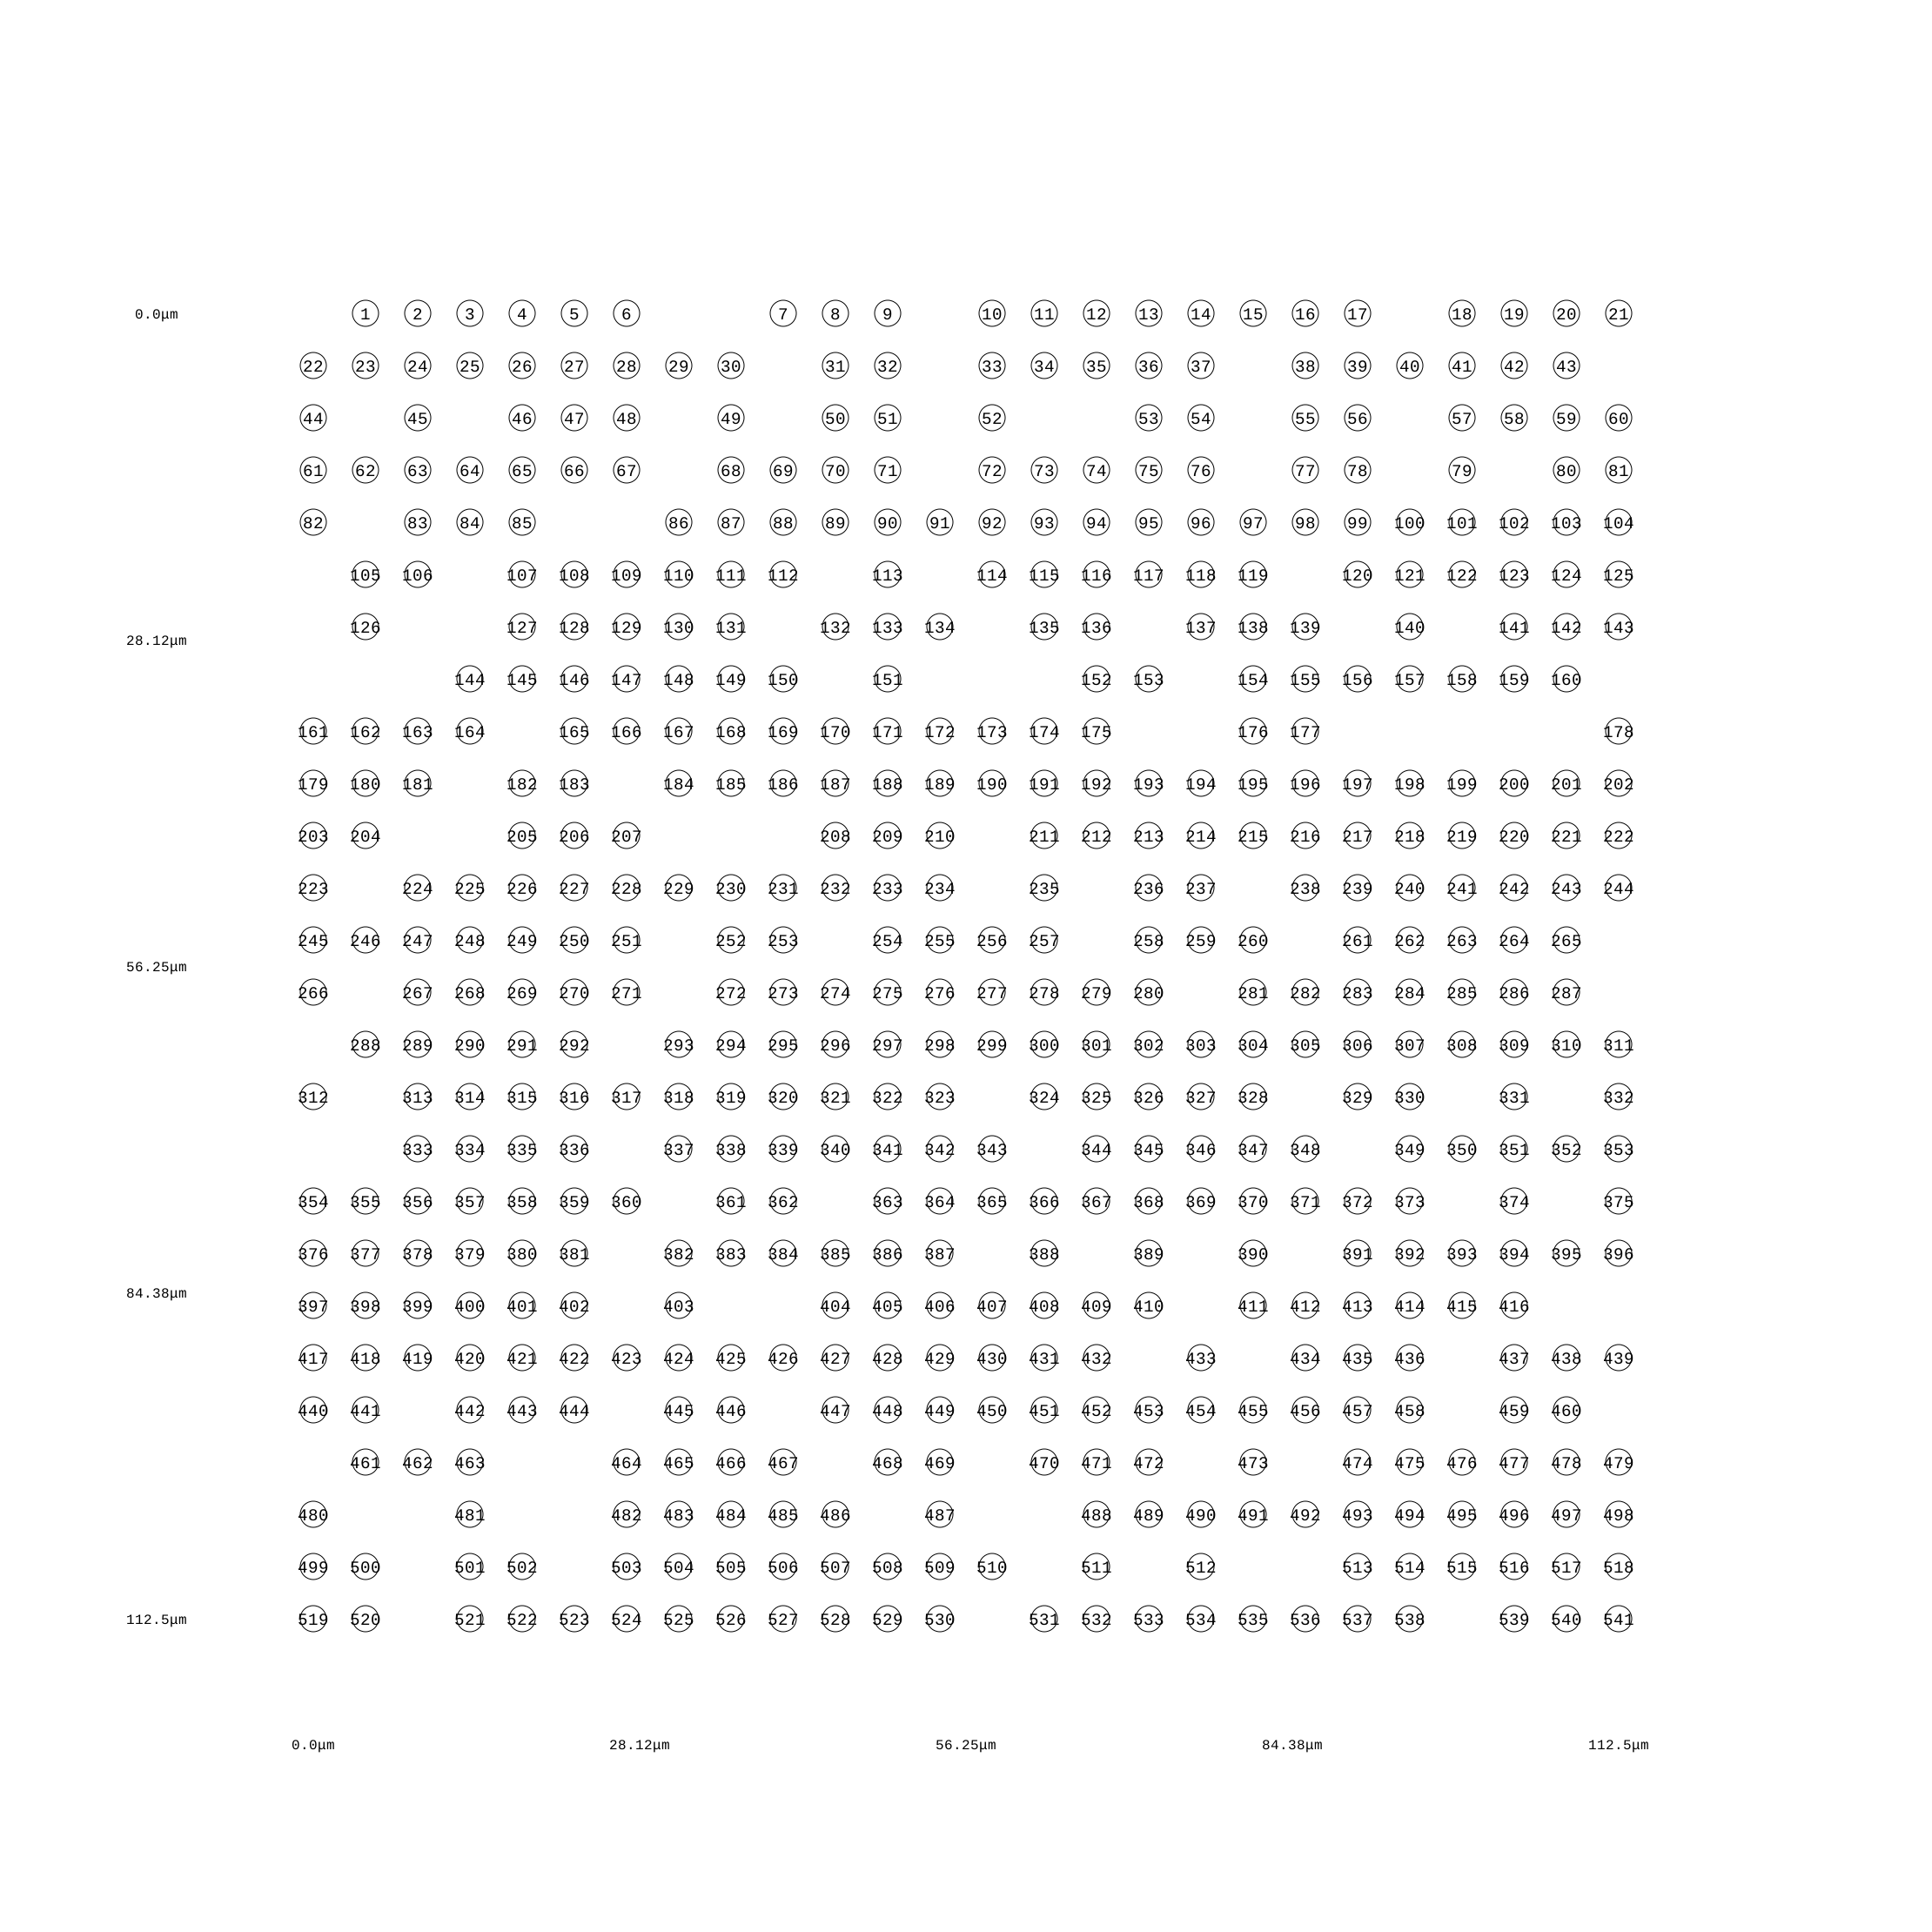

In [35]:
Random.seed!(2)
atoms = generate_sites(SquareLattice(), 26, 26; scale = 4.5) |> random_dropout(0.2)

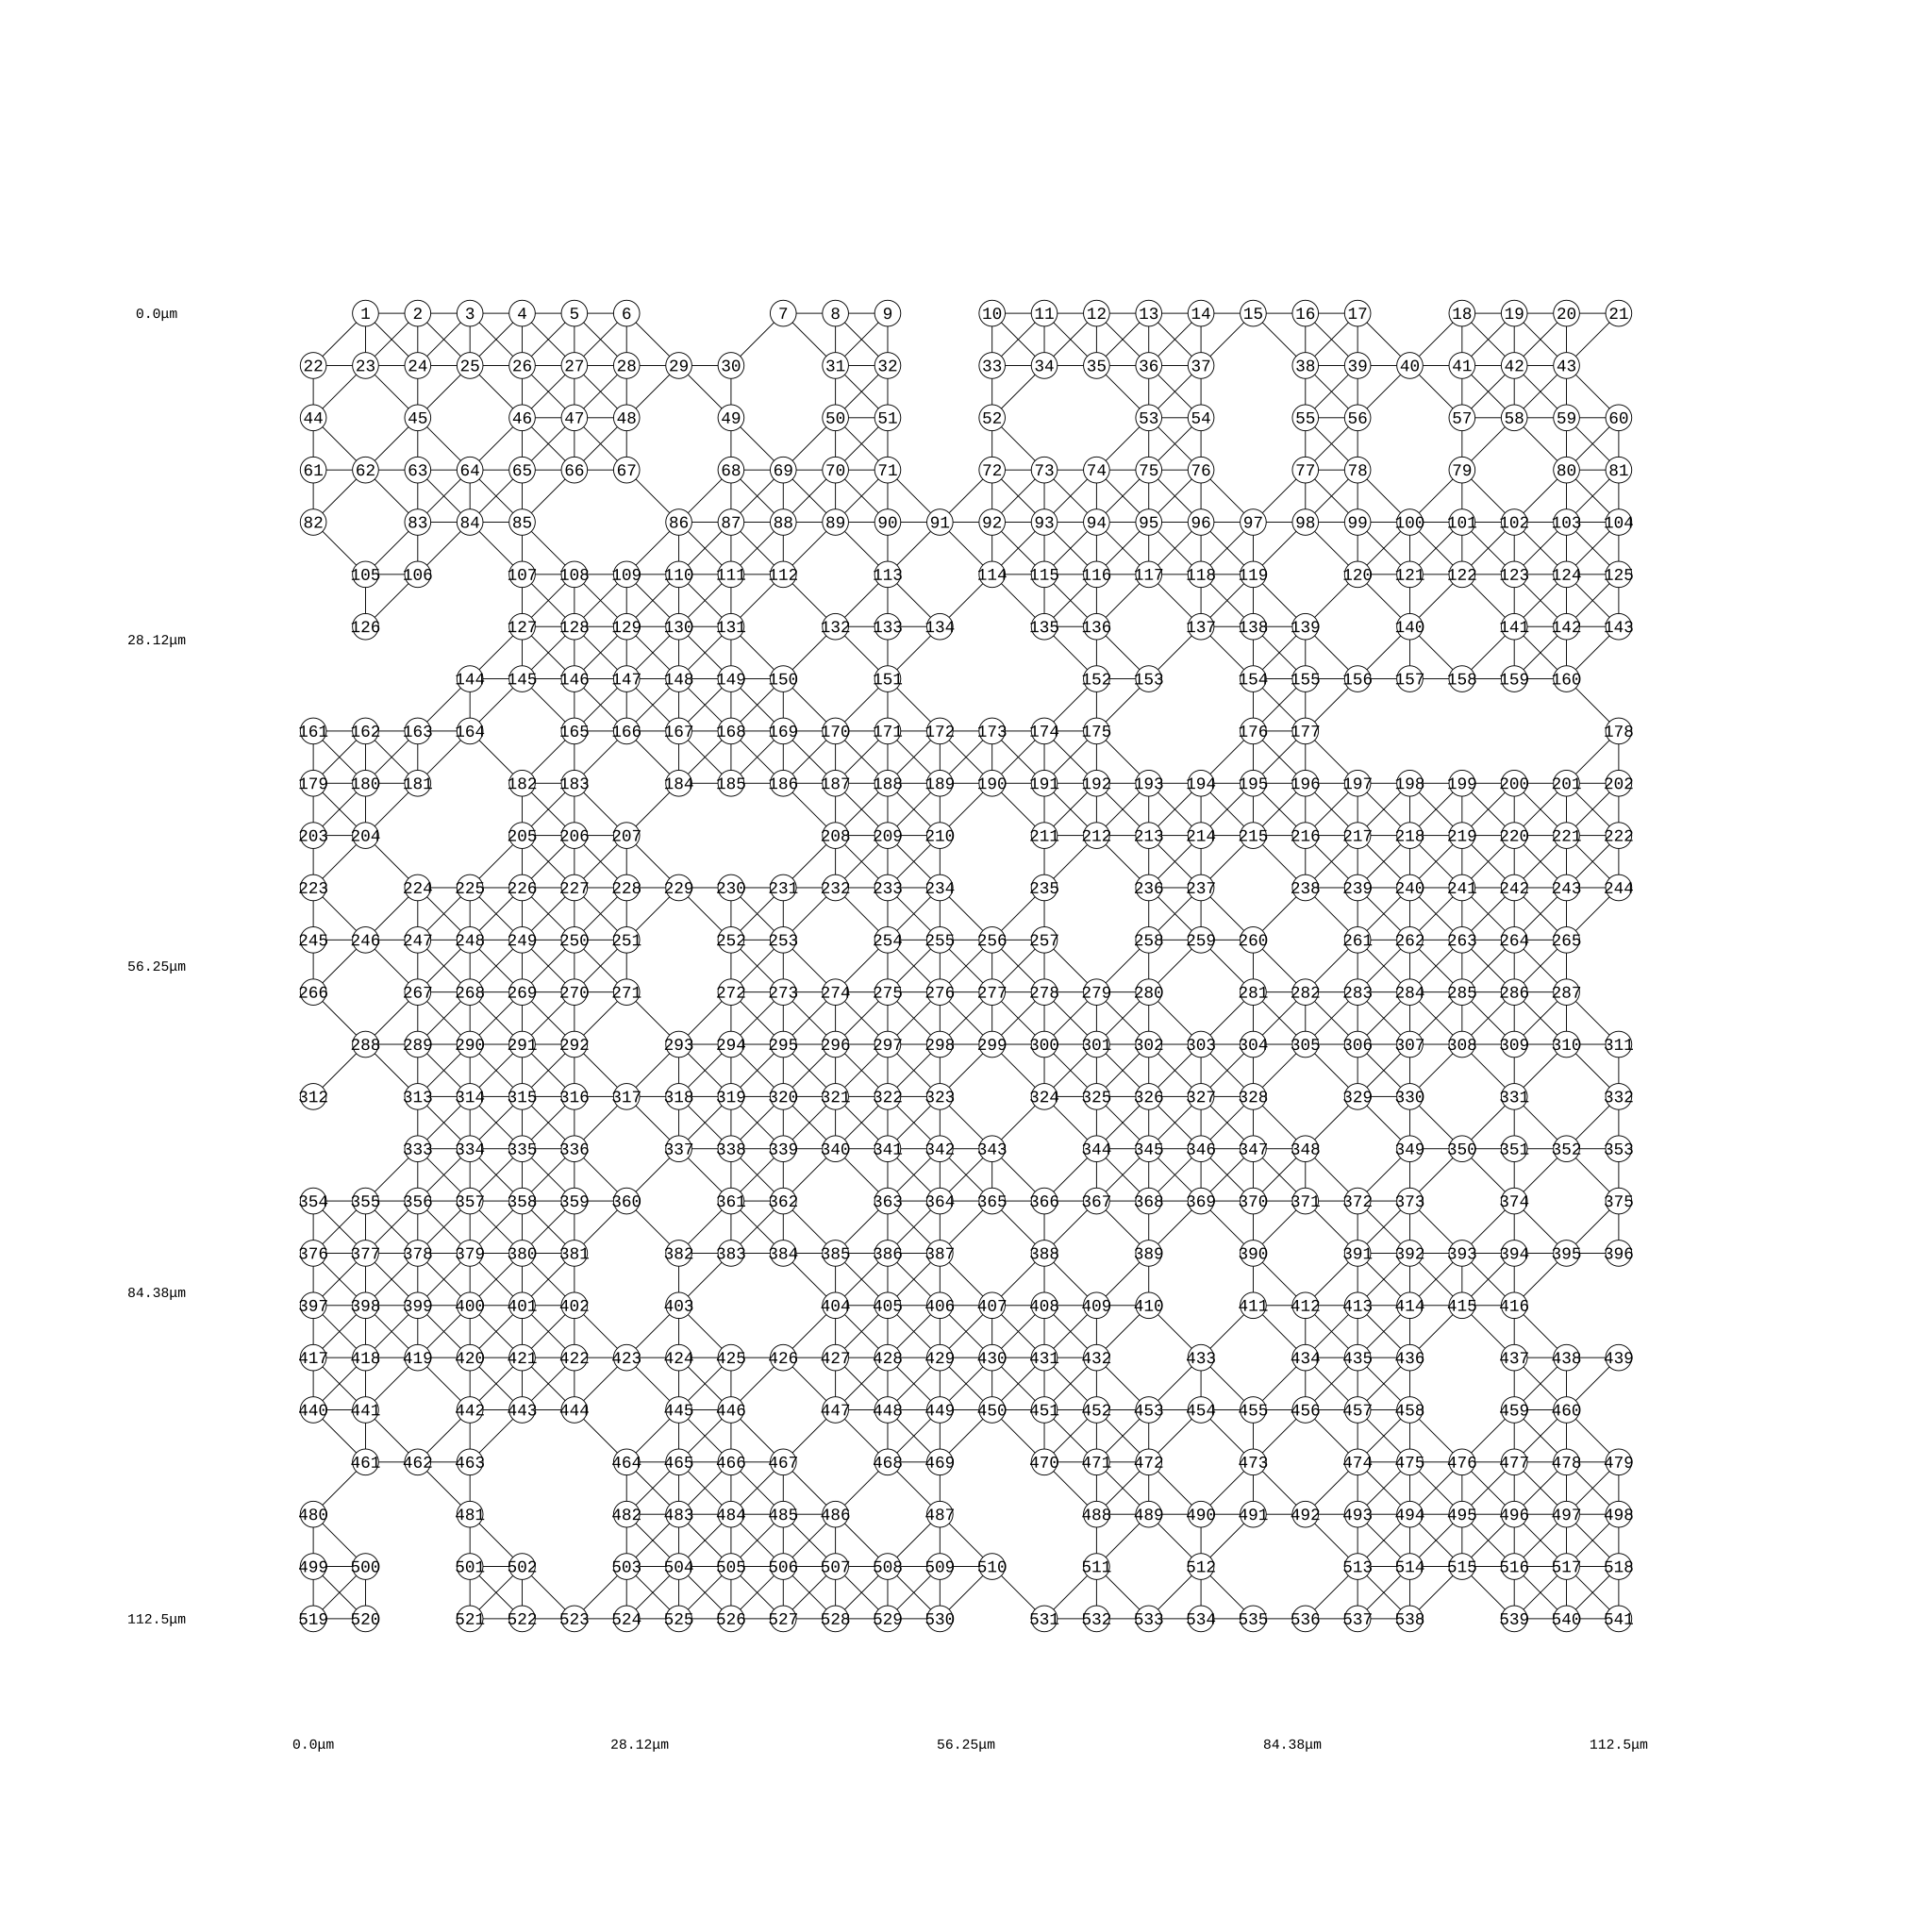

In [36]:
Bloqade.plot(atoms, blockade_radius = 7.5)

In [37]:
graph = BloqadeMIS.unit_disk_graph(atoms, 7.5)
mis_size_and_counting = GenericTensorNetworks.solve(IndependentSet(graph), CountingMax())[]

tcmalloc: large alloc 2147483648 bytes == 0x5cd1c000 @  0x7fe567e1fb6b 0x7fe567e3f379 0x7fe5662c7e18 0x7fe566291b3c 0x7fe533c6f493 0x7fe533c75c41 0x7fe533c75c9f 0x7fe56626ae0a 0x7fe533c58c99 0x7fe56626ae0a 0x7fe533c54ba3 0x7fe533c54c69 0x7fe533c529d8 0x7fe533c52891 0x7fe533c52891 0x7fe533c52891 0x7fe533c52891 0x7fe533c52891 0x7fe533c511aa 0x7fe533c51156 0x7fe56626ae0a 0x7fe56627d159 0x7fe533c5102e 0x7fe56626ae0a 0x7fe56627d159 0x7fe533c4eb19 0x7fe533c4eccf 0x7fe533c4ed2e 0x7fe56626ae0a 0x7fe566289e96 0x7fe56628990e
tcmalloc: large alloc 2147483648 bytes == 0xdcd1c000 @  0x7fe567e1fb6b 0x7fe567e3f379 0x7fe5662c7e18 0x7fe566290554 0x7fe566290fa8 0x7fe533cb1ff9 0x7fe56626ae0a 0x7fe5023e4486 0x7fe5023e4582 0x7fe56626ae0a 0x7fe5023e11be 0x7fe5023e395f 0x7fe56626ae0a 0x7fe533c583fa 0x7fe56626ae0a 0x7fe533c54ba3 0x7fe533c54c69 0x7fe533c529d8 0x7fe533c52891 0x7fe533c52891 0x7fe533c52891 0x7fe533c52891 0x7fe533c511aa 0x7fe533c51156 0x7fe56626ae0a 0x7fe56627d159 0x7fe533c5102e 0x7fe56626ae0a 0x7

(162.0, 6.2626787235072e14)ₜ

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

In [ ]:
gh repo clone jeanproujunior/CohortProject_2022_team15